In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index= ['영주', '기민', '라영', '기성'],
                   columns=['시간', '점수'])
data

,시간,점수
영주,2,20
기민,4,40
라영,8,80
기성,9,90


In [3]:
X = data[['시간']]
y = data['점수']
X, y

(    시간
 영주   2
 기민   4
 라영   8
 기성   9,
 영주    20
 기민    40
 라영    80
 기성    90
 Name: 점수, dtype: int64)

In [4]:
# 모델 선택
linear_model = LinearRegression()
# 파라미터가 없어서 사용하기 편리함
# 모델의 복잡도를 제어할 방법이 없음.

In [5]:
# 모델 학습
linear_model.fit(X,y)

LinearRegression()

In [6]:
# 모델의 가중치를 보는 방법
print(linear_model.coef_)
# 모델의 편향을 보는 방법
print(linear_model.intercept_)

[10.]
7.105427357601002e-15


In [7]:
# 예측
linear_model.predict([[7],[3]])

array([70., 30.])

In [8]:
linear_model.predict(X)

array([20., 40., 80., 90.])

In [9]:
from sklearn.linear_model import SGDRegressor

In [10]:
# 확률적 경사하강법
# max_iter = 최대 가중치 업데이트 횟수()
# eta0 = 학습률
# verbose = 학습결과를 확인
sgd_model = SGDRegressor(max_iter=5000,
                        eta0 = 0.01,
                        verbose= True) 

In [11]:
sgd_model.fit(X,y)

-- Epoch 1
Norm: 8.62, NNZs: 1, Bias: 1.143618, T: 4, Avg. loss: 917.008178
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.52, NNZs: 1, Bias: 1.268138, T: 8, Avg. loss: 16.924296
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 9.73, NNZs: 1, Bias: 1.294441, T: 12, Avg. loss: 1.328848
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 9.80, NNZs: 1, Bias: 1.297415, T: 16, Avg. loss: 0.295372
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 9.82, NNZs: 1, Bias: 1.295453, T: 20, Avg. loss: 0.192128
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 9.83, NNZs: 1, Bias: 1.291998, T: 24, Avg. loss: 0.176903
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 9.83, NNZs: 1, Bias: 1.287399, T: 28, Avg. loss: 0.176845
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 9.83, NNZs: 1, Bias: 1.283196, T: 32, Avg. loss: 0.175225
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 9.83, NNZs: 1, Bias: 1.279221, T: 36, Avg. loss: 0.172256
Total training time: 0.01 seconds.
-- Epoch 

SGDRegressor(max_iter=5000, verbose=True)

In [12]:
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.8485063]
[1.11950678]


### 보스턴 집값 예측

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()

In [14]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
boston['data'].shape

(506, 13)

In [18]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [19]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)

In [20]:
dfY = pd.DataFrame(boston.target, columns=['Price'])

In [21]:
df_boston = pd.concat([dfX,dfY], axis=1)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [22]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


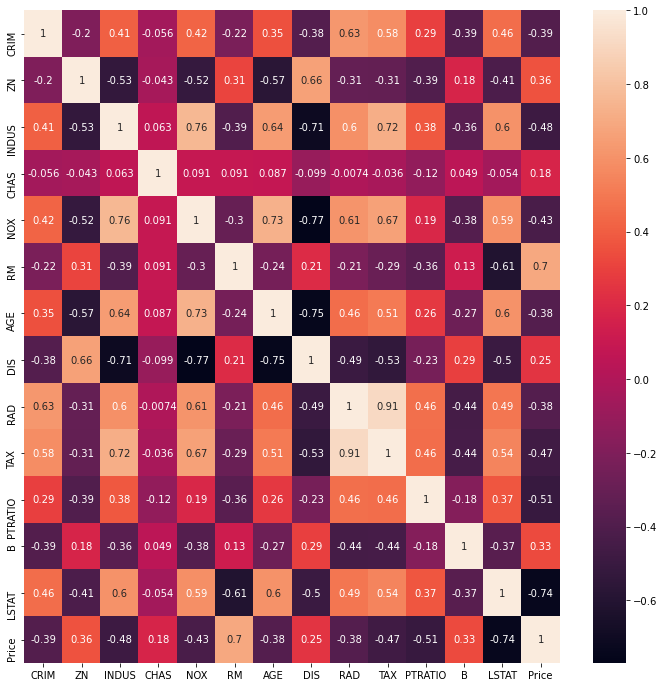

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 상관관계를 분석해보자
plt.figure(figsize=(12,12))
sns.heatmap(df_boston.corr(), annot=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, random_state = 0)

In [26]:
lr_model_boston = LinearRegression()

In [27]:
lr_model_boston.fit(X_train, y_train)

LinearRegression()

In [28]:
# 모델 평가
from sklearn.metrics import mean_squared_error
# MSE

In [29]:
pred_train = lr_model_boston.predict(X_train)
pred_test = lr_model_boston.predict(X_test)

In [32]:
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
# 오차가 얼마나 났는지를 평균을 내준 것 -> 낮은게 예측을 잘한 것

19.640519427908043
29.78224509230237


In [34]:
print(mean_squared_error(y_train, pred_train)**0.5)
print(mean_squared_error(y_test, pred_test)**0.5)

4.431762564477935
5.457311159564055


In [35]:
y_train.describe()

,Price
count,379.000000
mean,22.608707
std,9.248455
min,5.000000
25%,16.700000
50%,21.400000
75%,25.250000
max,50.000000


## 데이터의 특성확장

In [36]:
col = X_train.columns

# 맨처음 반복 i =0, j = 0, 그다음 반복 i=1,j=1
for i in range(col.size):
    for j in range(i, col.size):
        X_train[col[i]+ 'x'+ col[j]] = X_train[col[i]] * X_train[col[j]]

<ipython-input-36-8ea5d698478b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col[i]+ 'x'+ col[j]] = X_train[col[i]] * X_train[col[j]]


In [37]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,...,108900.0,6303.0,128412.90,6091.80,364.81,7432.383,352.586,151422.1569,7183.3398,340.7716
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,...,80656.0,5594.8,112719.60,2618.48,388.09,7818.930,181.634,157529.6100,3659.4180,85.0084
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,...,64516.0,4470.4,98869.50,1536.70,309.76,6850.800,106.480,151515.5625,2354.9625,36.6025
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,...,443556.0,13453.2,261058.68,11401.92,408.04,7917.996,345.824,153648.3204,6710.6976,293.0944
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,...,443556.0,13453.2,14365.62,17176.14,408.04,435.714,520.958,465.2649,556.2903,665.1241


In [39]:
for i in range(col.size):
    for j in range(i, col.size):
        X_test[col[i]+ 'x'+ col[j]] = X_test[col[i]] * X_test[col[j]]

<ipython-input-39-0c8c359ed30c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col[i]+ 'x'+ col[j]] = X_test[col[i]] * X_test[col[j]]


In [38]:
# 모델 선택
lr_model_boston2 = LinearRegression()

In [40]:
lr_model_boston2.fit(X_train, y_train)

LinearRegression()

In [41]:
pred_train = lr_model_boston2.predict(X_train)
pred_test = lr_model_boston2.predict(X_test)

In [42]:
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

4.090362612543777
32.06913512133684


## 규제모델 사용하기

Ridge 모델

In [43]:
from sklearn.linear_model import Ridge, Lasso

In [44]:
# 모델 선택과 학습을 연속으로 진행
ridge_boston = Ridge(alpha=10).fit(X_train, y_train)

In [45]:
pred_train = ridge_boston.predict(X_train)
pred_test = ridge_boston.predict(X_test)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

4.9825134790118
23.204339526798158


In [46]:
lasso_boston = Lasso(alpha=10).fit(X_train, y_train)

C:\Users\vdi02\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2227.2543010480877, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [47]:
pred_train = lasso_boston.predict(X_train)
pred_test = lasso_boston.predict(X_test)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

9.905795924606986
23.146155764026


In [49]:
print('사용한 특성의 수 : {}'.format(np.sum(lasso_boston.coef_ != 0)))

사용한 특성의 수 : 30


R2 스코어

In [50]:
print(lasso_boston.score(X_train, y_train))
print(lasso_boston.score(X_test, y_test))

0.8838823020676209
0.7166899057482219


### 최적의 alpha 찾기

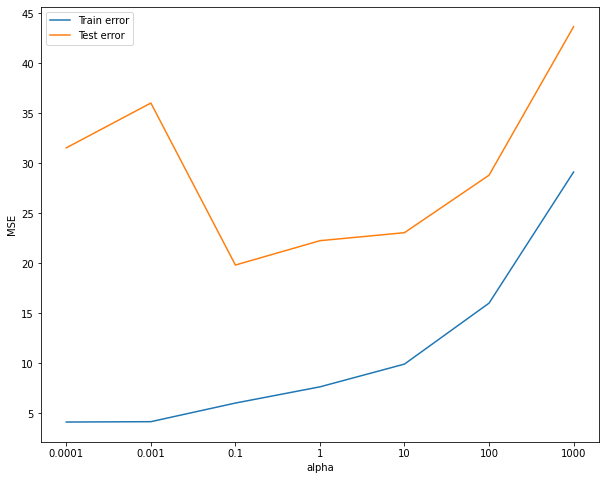

In [52]:
import warnings
warnings.filterwarnings('ignore')

train_error = []
test_error = []

alpha_list = ['0.0001', '0.001', '0.1', '1', '10', '100','1000']

for i in alpha_list:
    lasso_model = Lasso(alpha=float(i), max_iter=50000).fit(X_train, y_train)
    pred = lasso_model.predict(X_train)
    train_error.append(mean_squared_error(y_train, pred))
    pred = lasso_model.predict(X_test)
    test_error.append(mean_squared_error(y_test, pred))
    
plt.figure(figsize=(10,8))
plt.plot(alpha_list, train_error, label = 'Train error')
plt.plot(alpha_list, test_error, label = 'Test error')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# 실제 모델의 파라미터 이름을 키값으로 딕셔너리를 생성

In [55]:
lasso_boston = Lasso()
# scoring : 어떤 평가기준을 가지고 평가를 진행할지 설정
#        생략시 해당 모델의 score()함수를 사용, 분류(accuracy, f1), 회귀(mean_squared_error, r2)
# n_jobs : 병렬처리 수, 생략시 1, -1을 주게될 경우 사용할 수 있는 
grid_search = GridSearchCV(lasso_boston, param_grid, cv = 5, n_jobs=-1)

In [56]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [57]:
print(grid_search.score(X_train, y_train))
print(grid_search.score(X_test, y_test))

0.8838823020676209
0.7166899057482219


In [58]:
pred_test = grid_search.predict(X_test)

In [59]:
grid_search.best_params_
# 최적의 매개변수

{'alpha': 10}

In [60]:
grid_search.best_score_
# 최고 교차검증 점수

0.8219815568399605

In [61]:
grid_search.best_estimator_
# 최적매개변수를 가지는 전체모델을 확인

Lasso(alpha=10)

In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(Lasso(alpha=10), X_train, y_train, cv = 5).mean()

0.8219815568399605

In [64]:
!python -V

Python 3.8.5
